## Logistic Regression

We try to predict defaulters here using `logistic regression`. A logistic regression model is quite suitable here since we only have 2 classes to classify the data into. That is, defaulters and non defaulters.

In [42]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read cleaned data
data = pd.read_csv("data/cleaned_final.csv")

In [3]:
# Sample 100% of data
shuffled = data.sample(frac=1) 
shuffled.reset_index(drop=True, inplace=True)
shuffled

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,0.000000,0.000546,0.057239,0.257000,0.726391,0.031465,0.950024,0.479505,0.695652,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000000,0.001508,0.326599,0.635991,0.396519,0.028565,0.749149,0.748089,0.652174,...,0,0,0,0,0,0,0,0,0,0
2,1,0.105263,0.000392,0.046016,0.276330,0.561084,0.032405,0.747690,0.354314,0.434783,...,0,0,0,0,0,0,0,0,0,0
3,1,0.052632,0.000931,0.048260,0.309272,0.743966,0.046543,0.762322,0.371822,0.565217,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000000,0.001700,0.046016,0.392880,0.873039,0.046198,0.838116,0.704043,0.478261,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244275,0,0.000000,0.002970,0.214366,0.491595,0.369586,0.035818,0.823484,0.684869,0.478261,...,0,0,0,0,0,0,0,0,0,0
244276,0,0.000000,0.000931,0.072952,0.421848,0.638516,0.045238,0.969925,0.381131,0.391304,...,0,0,0,0,0,0,0,0,0,0
244277,1,0.000000,0.000354,0.023569,0.065247,0.255806,1.000000,0.569836,0.524107,0.652174,...,0,0,0,0,0,0,0,0,0,0
244278,0,0.000000,0.001316,0.158249,0.138276,0.441712,0.035187,0.658601,0.864110,0.652174,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split the data into training set and 25% test set
x = shuffled.iloc[:, 1:]
y = shuffled['TARGET']
class_labels = ['Non Defaulter', 'Defaulter']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(195424, 156) (48856, 156) (195424,) (48856,)


In [25]:
# Train logistic regression model
logistic_regression_model = LogisticRegression(solver='liblinear', random_state=0)
logistic_regression_model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
# Calculate model's accuracy
score = logistic_regression_model.score(x_test, y_test)
print('Logistic Regression Model accuracy score:', score)

Logistic Regression Model accuracy score: 0.9226502374324546


In [99]:
def plot_cm(model, model_name):
    disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test,
                                                 cmap="Blues", display_labels=class_labels)
    score = model.score(x_test, y_test)
    true_positives = int(disp.text_[1][1].get_text())
    true_negatives = int(disp.text_[0][0].get_text())
    false_positives = int(disp.text_[0][1].get_text())
    false_negatives = int(disp.text_[1][0].get_text())
    total_non_defaulters = true_negatives + false_positives
    total_defaulters = true_positives + false_negatives
    true_positive_rate = (true_positives / total_defaulters) * 100
    false_negative_rate = (false_negatives / total_defaulters) * 100
    true_negative_rate = (true_negatives / total_non_defaulters) * 100
    false_positive_rate = (false_positives / total_non_defaulters) * 100
    disp.ax_.set_title(f'Confusion matrix of {model_name}\n' 
                       + f'Accuracy score: {score}\n' 
                       + f'True positive rate: {true_positive_rate}\n' 
                       + f'False negative rate: {false_negative_rate}\n' 
                       + f'True negative rate: {true_negative_rate}\n' 
                       + f'False positive rate: {false_positive_rate}')
    plt.show()

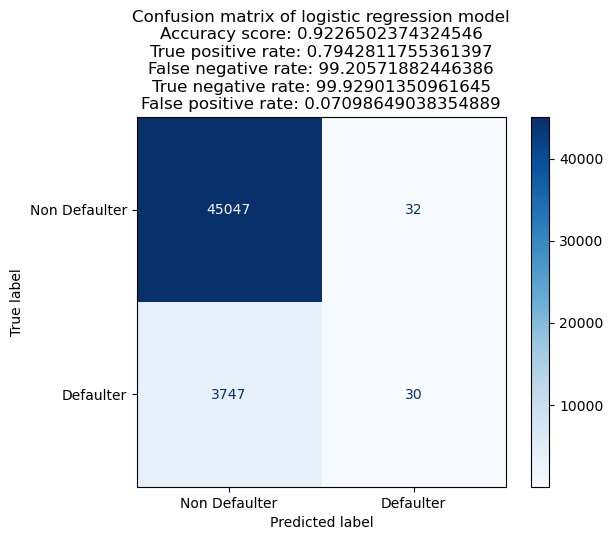

In [100]:
plot_cm(logistic_regression_model, 'logistic regression model')

As we can see, the false negative rate of this model is extremely high, even though the accuracy is high. This indicates that other models may need to be explored.

## Naïve Bayes Classifier 

Next, we try and see if we can predict defaulters better with Naïve bayes classifiers, specifically `Bernoulli Naive Bayes` classifier.

In [39]:
# Training and fitting the data with bernoulli naive bayes
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9226502374324546

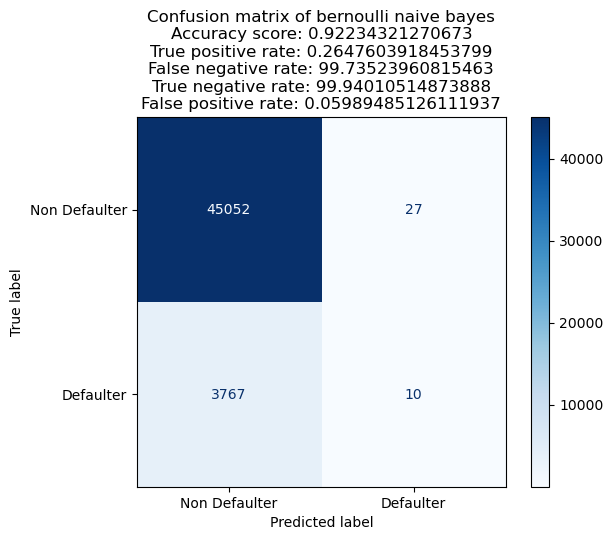

In [40]:
plot_cm(mnb_model, 'bernoulli naive bayes')

## K Nearest Neighbors

Lastly, we try with `K Nearest Neighbors` classifier with weighted distances and various k values.

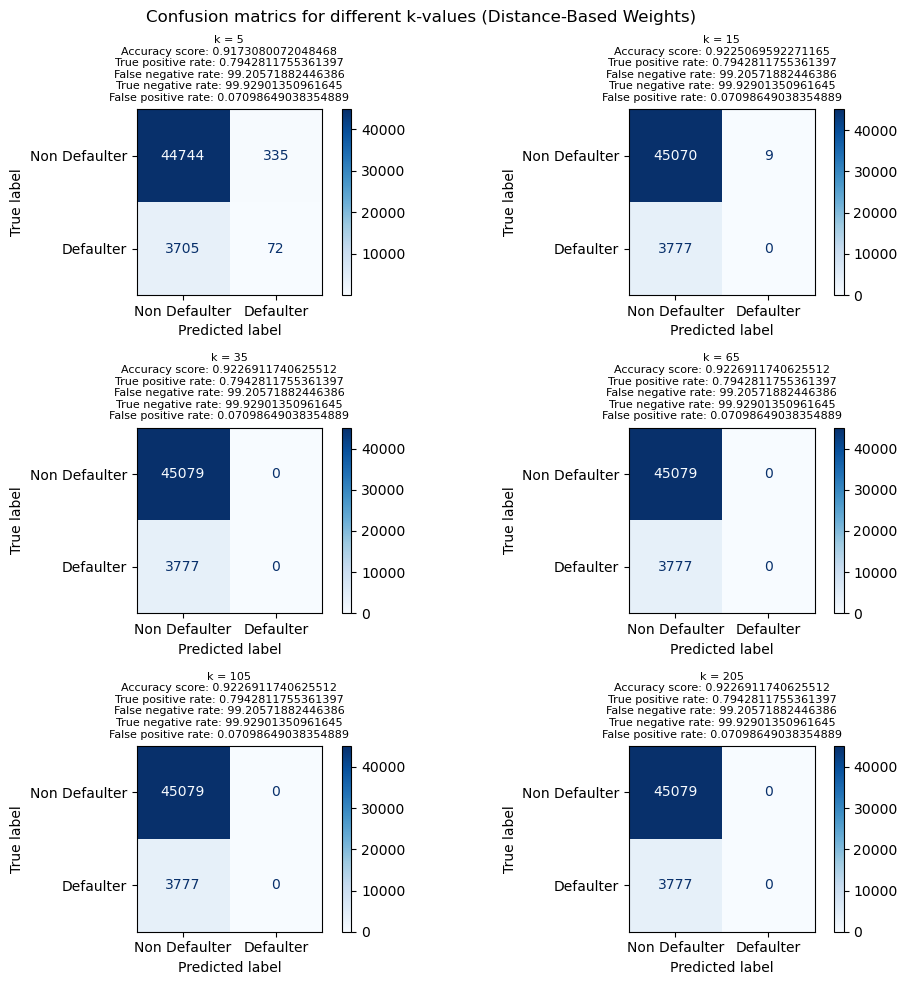

In [102]:
k_values = [5, 15, 35, 65, 105, 205]
fig, axs = plt.subplots(3, 2, figsize=(10,10))
for i, ax in enumerate(fig.axes):
    # Generate model
    knn_distance_model = KNeighborsClassifier(n_neighbors=k_values[i], weights="distance")
    
    # Train the model using the training sets
    knn_distance_model.fit(x_train,y_train)

    # Calculate model's accuracy score
    score = knn_distance_model.score(x_test, y_test)
    
    # Plot confusion matrix for specific k-value
    ConfusionMatrixDisplay.from_estimator(knn_distance_model, x_test, y_test, ax=ax, cmap="Blues", display_labels=class_labels)
    ax.set_title(f'k = {k_values[i]}\n' 
                 + f'Accuracy score: {score}\n' 
                 + f'True positive rate: {true_positive_rate}\n' 
                 + f'False negative rate: {false_negative_rate}\n' 
                 + f'True negative rate: {true_negative_rate}\n' 
                 + f'False positive rate: {false_positive_rate}')
    ax.title.set_size(8)
     
fig.suptitle("Confusion matrics for different k-values (Distance-Based Weights)")
plt.tight_layout()
plt.show()